




<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS458 Research Assignment 2
<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div><br>

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

<div class="alert alert-block alert-info">
<b>The CIFAR-10 dataset</b><br>
https://www.cs.toronto.edu/~kriz/cifar.html
    </div>

## Import packages needed 

In [1]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd
import time

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense, BatchNormalization

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [3]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.5.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.5.0


### Mount Google Drive to Colab Enviorment

In [5]:
#Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
#Establish working directory

import os # Operation System
os.getcwd()
%cd /content/gdrive/MyDrive/458Data/Assignment2/

/content/gdrive/MyDrive/458Data/Assignment2


## Loading cifar10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br>

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


In [7]:
(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()

* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
* x_train, x_test: uint8 arrays of color image data with shapes (num_samples, 32, 32).
* y_train, y_test: uint8 arrays of digit labels (integers in range 0-9)

## EDA Training and Test Datasets

* Imported 50000 examples for training and 10000 examples for test 
* Imported 50000 labels for training and 10000 labels for test 

In [8]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t\t{}'.format(test_images.shape))
print('test_labels:\t\t{}'.format(test_labels.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:		(10000, 32, 32, 3)
test_labels:		(10000, 1)


### Review labels for training dataset

In [9]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

This output the numeric label, need to convert to item description


### Plot Examples

In [10]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [12]:
x_preview, y_preview = get_three_classes(x_train, y_train)
x_preview, y_preview = get_three_classes(x_test, y_test)

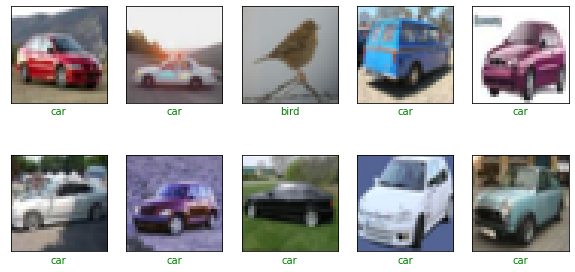

In [13]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

### Random Review of Examples 

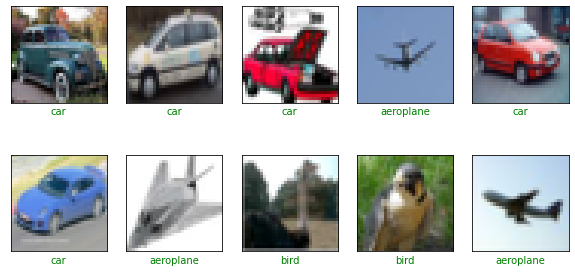

In [14]:
show_random_examples(x_preview, y_preview, y_preview)

## Preprocessing Data for Model Development

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|Label  |Class_  |
|-------|--------|
|0|	airplane     |
|1|	automobile   |
|2|	bird         |
|3|	cat          |
|4|	deer         |
|5|	dog          |
|6|	frog         |
|7|	horse        |
|8|	ship         |
|9|	truck        |

In [15]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

In [16]:
# array for collecting training times
train_times = []

### Preprocessing the Examples
 The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
 

1. Each element in each example is a pixel value
2. Pixel values range from 0 to 255
3. 0 = black
4. 255 = white

In [17]:
train_images_norm = train_images.astype('float32')/255.
test_images_norm = test_images.astype('float32')/255.

In [18]:
train_images_norm.shape, test_images_norm.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Validating our approach

10,000 samples of our training data to use as a validation set. 

In [19]:
val_images_norm, train_images_norm = train_images_norm[:3000], train_images_norm[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [20]:
val_images_norm.shape, val_labels.shape

((3000, 32, 32, 3), (3000, 1))

In [21]:
train_images_norm.shape, train_labels.shape

((47000, 32, 32, 3), (47000, 1))

## Create the Model

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/CNN_architecture_v4.png?raw=1">


### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 4 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         1

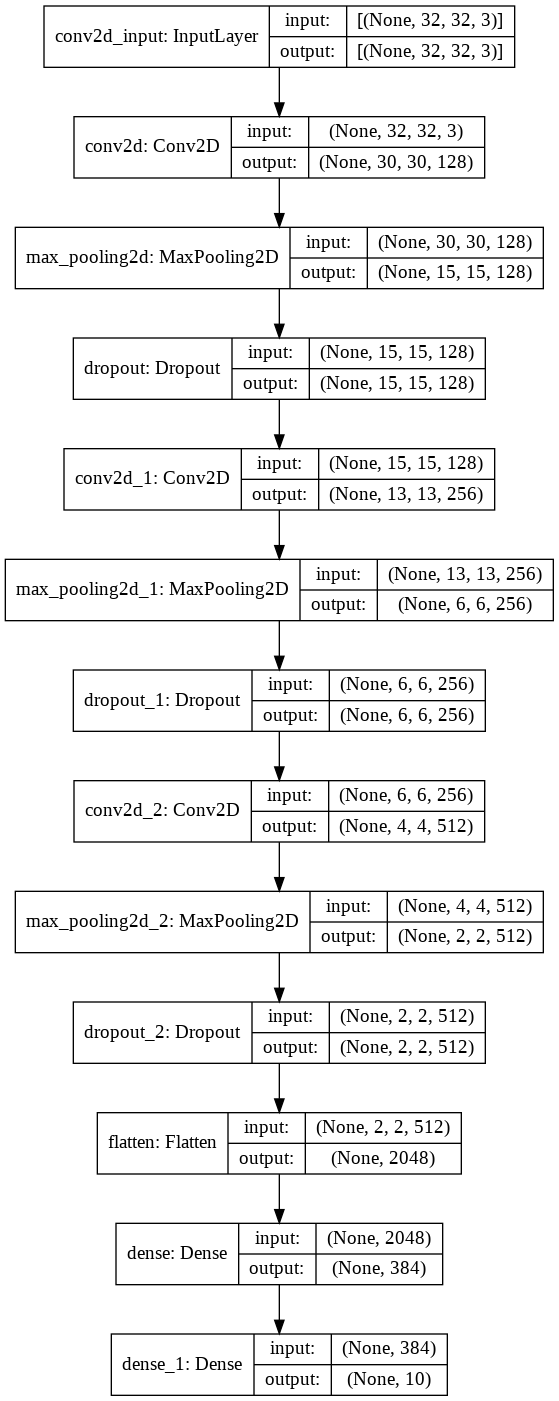

In [24]:
keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

### Compiling the model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimised in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimises the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

<div class="alert alert-block alert-info">
<b>tf.keras.losses.SparseCategoricalCrossentropy</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy</div>

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

<div class="alert alert-block alert-success">
    <b>Module: tf.keras.callbacks</b></div>

<div class="alert alert-block alert-info">
<b>tf.keras.callbacks.EarlyStopping</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping</div>

<div class="alert alert-block alert-info">
<b>tf.keras.callbacks.ModelCheckpoint</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint</div>

In [26]:
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

Epoch 1/200
92/92 [==============================] - 20s 46ms/step - loss: 2.1594 - accuracy: 0.2852 - val_loss: 1.6711 - val_accuracy: 0.4373
Epoch 2/200
92/92 [==============================] - 3s 35ms/step - loss: 1.5499 - accuracy: 0.4642 - val_loss: 1.3420 - val_accuracy: 0.5627
Epoch 3/200
92/92 [==============================] - 3s 35ms/step - loss: 1.3455 - accuracy: 0.5440 - val_loss: 1.2072 - val_accuracy: 0.6043
Epoch 4/200
92/92 [==============================] - 3s 35ms/step - loss: 1.2121 - accuracy: 0.5945 - val_loss: 1.0750 - val_accuracy: 0.6573
Epoch 5/200
92/92 [==============================] - 3s 35ms/step - loss: 1.1096 - accuracy: 0.6312 - val_loss: 1.0086 - val_accuracy: 0.6710
Epoch 6/200
92/92 [==============================] - 3s 35ms/step - loss: 1.0448 - accuracy: 0.6556 - val_loss: 0.9274 - val_accuracy: 0.7047
Epoch 7/200
92/92 [==============================] - 3s 35ms/step - loss: 1.0055 - accuracy: 0.6700 - val_loss: 0.9091 - val_accuracy: 0.7057
Epoch

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [27]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.6783 - accuracy: 0.7959
test set accuracy:  79.58999872207642


## Predictions

In [28]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
29  0.540     0.840     0.667         0.795
30  0.539     0.839     0.640         0.815
31  0.520     0.847     0.664         0.804
32  0.509     0.850     0.629         0.813
33  0.501     0.854     0.634         0.814

In [31]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

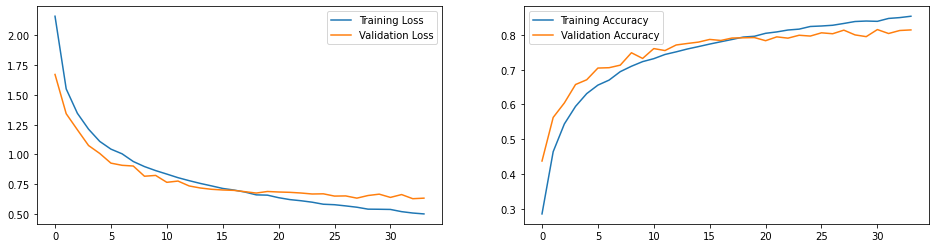

In [32]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [33]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [34]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[810,  17,  36,  18,  11,   4,  10,   8,  64,  22],
       [ 10, 890,   5,   5,   1,   3,  14,   4,  28,  40],
       [ 57,   6, 655,  70,  71,  39,  72,  15,  10,   5],
       [  5,   4,  44, 714,  58,  88,  51,  14,   7,  15],
       [ 13,   1,  33,  48, 793,  20,  53,  35,   4,   0],
       [ 13,   0,  26, 210,  42, 659,  23,  19,   4,   4],
       [  4,   5,  21,  55,  19,   5, 883,   3,   4,   1],
       [ 15,   2,  16,  58,  44,  45,   4, 804,   4,   8],
       [ 41,  15,  14,  10,   3,   1,   6,   0, 902,   8],
       [ 16,  54,  10,  16,   3,   1,   8,  11,  32, 849]], dtype=int32)>

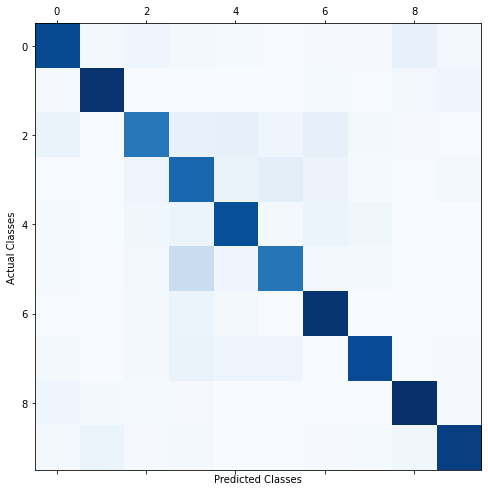

In [35]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

<div class="alert alert-block alert-info">
<b>tf.keras.models.load_model</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model</div>

In [36]:
model = tf.keras.models.load_model('./models/model_0.8020.h5')

In [37]:
preds = model.predict(test_images_norm)

In [38]:
preds.shape

(10000, 10)

### Predictions

In [39]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [40]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

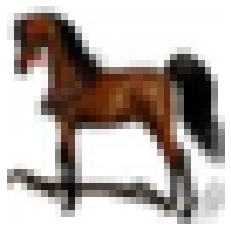

In [41]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2004]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [42]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [43]:
activations = activation_model.predict(img_tensor)
len(activations)

8

In [44]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d',
 'max_pooling2d',
 'dropout',
 'conv2d_1',
 'max_pooling2d_1',
 'dropout_1',
 'conv2d_2',
 'max_pooling2d_2',
 'dropout_2',
 'flatten',
 'dense',
 'dense_1']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


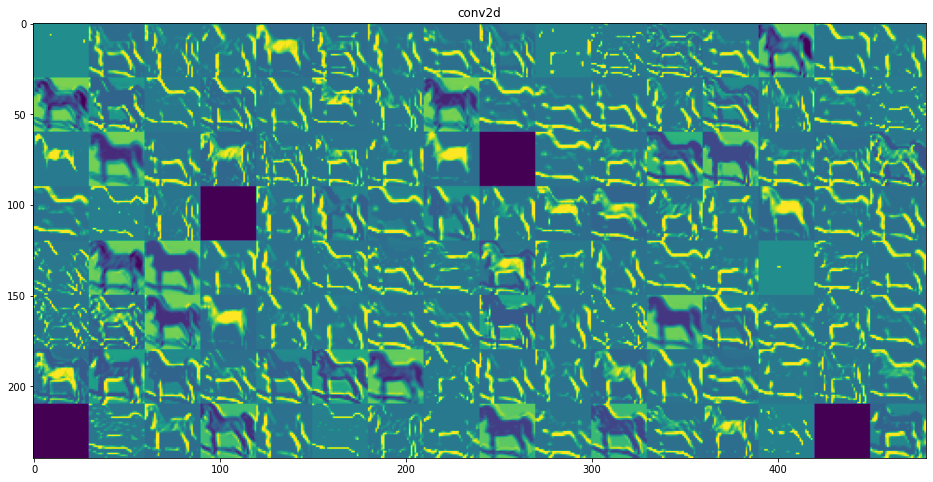

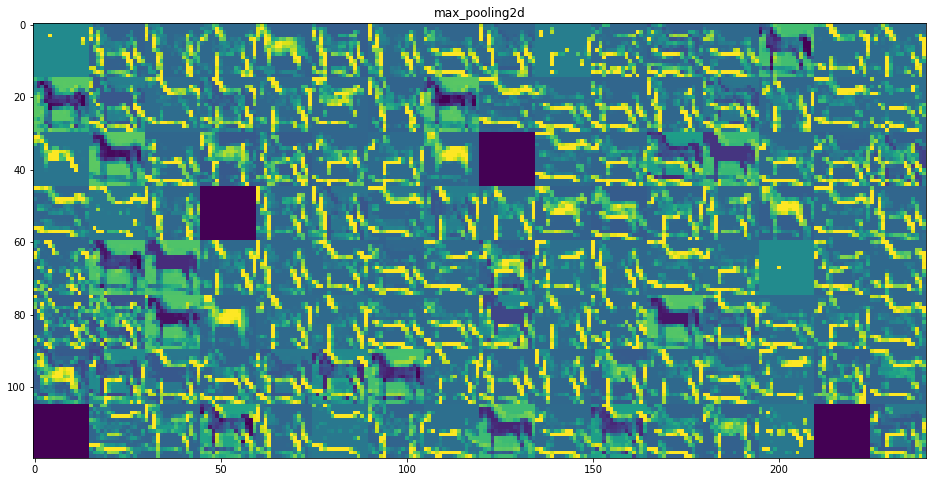

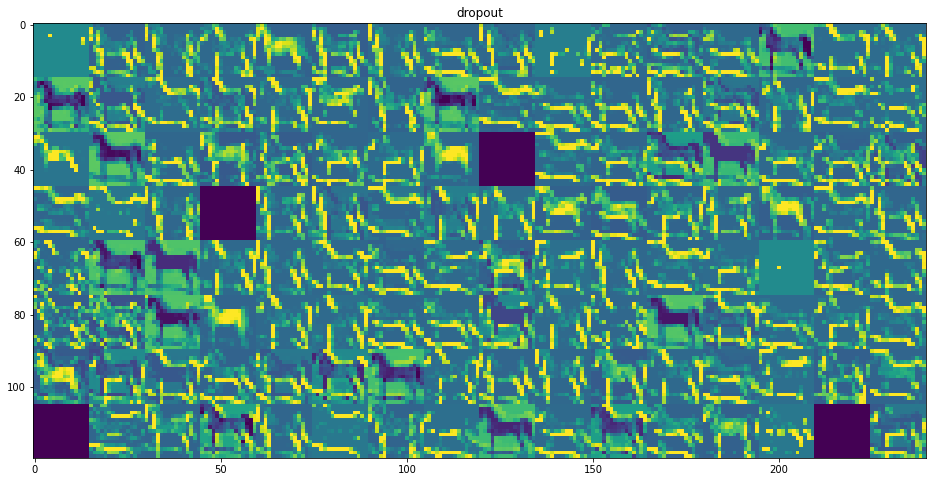

In [45]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

## Experiments

### Experiment 1
Two dense layers

128 units, 10 unit output layer

In [177]:
experiment1 = models.Sequential()
#input layer/first dense layer
experiment1.add(layers.Dense(units = 128, activation=tf.nn.relu, input_shape=(32, 32, 3)))
#flatten input/first dense layer
experiment1.add(layers.Flatten())
#output layer
experiment1.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [178]:
experiment1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32, 32, 128)       512       
_________________________________________________________________
flatten_18 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1310730   
Total params: 1,311,242
Trainable params: 1,311,242
Non-trainable params: 0
_________________________________________________________________


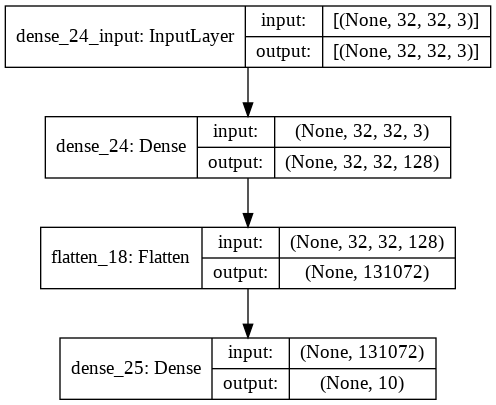

In [179]:
keras.utils.plot_model(experiment1, "exp1.png", show_shapes=True) 

In [180]:
experiment1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [181]:
# start = time.process_time()

history_exp1 = experiment1.fit(train_images_norm
                    ,train_labels
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

# stop = time.process_time()
# runtime = stop - start
# train_times.append(runtime)

Epoch 1/20
92/92 [==============================] - 3s 28ms/step - loss: 2.2927 - accuracy: 0.3176 - val_loss: 1.6260 - val_accuracy: 0.4310
Epoch 2/20
92/92 [==============================] - 2s 27ms/step - loss: 1.5825 - accuracy: 0.4523 - val_loss: 1.5275 - val_accuracy: 0.4663
Epoch 3/20
92/92 [==============================] - 2s 27ms/step - loss: 1.5172 - accuracy: 0.4716 - val_loss: 1.4934 - val_accuracy: 0.4737
Epoch 4/20
92/92 [==============================] - 2s 27ms/step - loss: 1.4650 - accuracy: 0.4906 - val_loss: 1.4633 - val_accuracy: 0.4933
Epoch 5/20
92/92 [==============================] - 2s 27ms/step - loss: 1.4346 - accuracy: 0.5037 - val_loss: 1.4524 - val_accuracy: 0.4903
Epoch 6/20
92/92 [==============================] - 2s 27ms/step - loss: 1.4134 - accuracy: 0.5110 - val_loss: 1.4411 - val_accuracy: 0.4947
Epoch 7/20
92/92 [==============================] - 2s 27ms/step - loss: 1.3871 - accuracy: 0.5222 - val_loss: 1.4257 - val_accuracy: 0.5067
Epoch 8/20
92

In [182]:
loss, accuracy = experiment1.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

exp1loss = loss
exp1acc = accuracy

313/313 [==============================] - 1s 2ms/step - loss: 1.4437 - accuracy: 0.4935
test set accuracy:  49.34999942779541


In [183]:
preds_exp1 = experiment1.predict(test_images_norm)
print('shape of preds: ', preds_exp1.shape)

shape of preds:  (10000, 10)


### Experiment 2
Three dense layers

128 units, 256 units, 10 unit output layer

In [53]:
experiment2 = models.Sequential()
#input layer/first dense layer
experiment2.add(layers.Dense(units = 128, activation=tf.nn.relu, input_shape=(32, 32, 3)))
experiment2.add(layers.Dense(units = 256, activation=tf.nn.relu))
#flatten
experiment2.add(layers.Flatten())
#output layer
experiment2.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [54]:
experiment2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32, 32, 128)       512       
_________________________________________________________________
dense_5 (Dense)              (None, 32, 32, 256)       33024     
_________________________________________________________________
flatten_2 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2621450   
Total params: 2,654,986
Trainable params: 2,654,986
Non-trainable params: 0
_________________________________________________________________


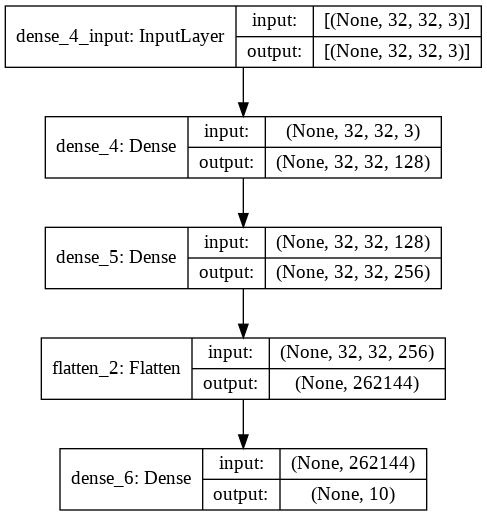

In [55]:
keras.utils.plot_model(experiment2, "exp2.png", show_shapes=True) 

In [56]:
experiment2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [57]:
start = time.process_time()

history_exp2 = experiment2.fit(train_images_norm
                    ,train_labels
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])
stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/20
92/92 [==============================] - 7s 76ms/step - loss: 1.9600 - accuracy: 0.3529 - val_loss: 1.5525 - val_accuracy: 0.4563
Epoch 2/20
92/92 [==============================] - 7s 74ms/step - loss: 1.5156 - accuracy: 0.4728 - val_loss: 1.4562 - val_accuracy: 0.4887
Epoch 3/20
92/92 [==============================] - 7s 74ms/step - loss: 1.4290 - accuracy: 0.5021 - val_loss: 1.4197 - val_accuracy: 0.5140
Epoch 4/20
92/92 [==============================] - 7s 74ms/step - loss: 1.3817 - accuracy: 0.5207 - val_loss: 1.4148 - val_accuracy: 0.5113
Epoch 5/20
92/92 [==============================] - 7s 75ms/step - loss: 1.3443 - accuracy: 0.5364 - val_loss: 1.4086 - val_accuracy: 0.5103
Epoch 6/20
92/92 [==============================] - 7s 75ms/step - loss: 1.3152 - accuracy: 0.5454 - val_loss: 1.3907 - val_accuracy: 0.5160
Epoch 7/20
92/92 [==============================] - 7s 75ms/step - loss: 1.2829 - accuracy: 0.5589 - val_loss: 1.4085 - val_accuracy: 0.5120
Epoch 8/20
92

In [58]:
loss, accuracy = experiment2.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp2loss = loss
exp2acc = accuracy

313/313 [==============================] - 1s 4ms/step - loss: 1.4380 - accuracy: 0.4986
test set accuracy:  49.86000061035156


In [59]:
preds_exp2 = experiment2.predict(test_images_norm)
print('shape of preds: ', preds_exp2.shape)

shape of preds:  (10000, 10)


### Experiment 3
Two convolutional layers

128 units + maxpool, 256 units + maxpool, 10 unit output layer

In [60]:
experiment3 = models.Sequential()
#input layer and first convulutional layer
experiment3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment3.add(layers.MaxPool2D((2, 2),strides=2))
#second convulutional layer
experiment3.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
experiment3.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#reshape before output layer
experiment3.add(layers.Flatten())
#output layer
experiment3.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [61]:
experiment3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                92170     
Total params: 390,922
Trainable params: 390,922
Non-trainable params: 0
________________________________________________

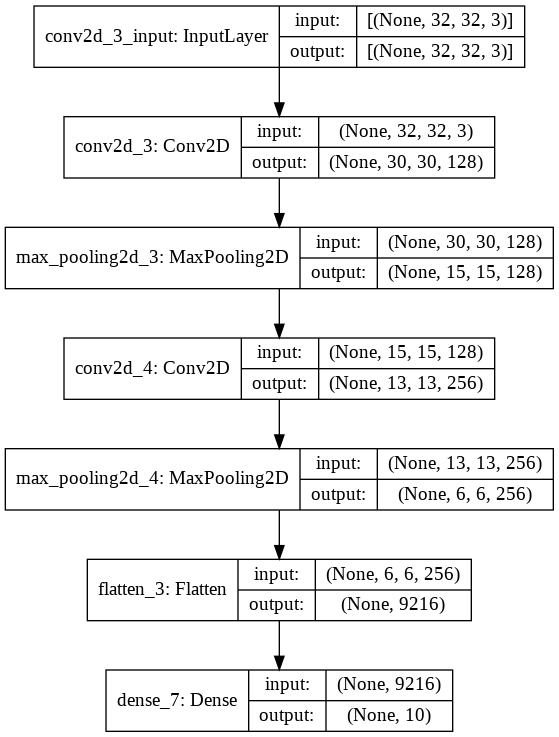

In [62]:
keras.utils.plot_model(experiment3, "exp3.png", show_shapes=True) 

In [63]:
experiment3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [64]:
start = time.process_time()

history_exp3 = experiment3.fit(train_images_norm
                    ,train_labels
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/20
92/92 [==============================] - 3s 26ms/step - loss: 1.7207 - accuracy: 0.3848 - val_loss: 1.4093 - val_accuracy: 0.5043
Epoch 2/20
92/92 [==============================] - 2s 24ms/step - loss: 1.3499 - accuracy: 0.5279 - val_loss: 1.2116 - val_accuracy: 0.5863
Epoch 3/20
92/92 [==============================] - 2s 25ms/step - loss: 1.1944 - accuracy: 0.5862 - val_loss: 1.1338 - val_accuracy: 0.6083
Epoch 4/20
92/92 [==============================] - 2s 24ms/step - loss: 1.1134 - accuracy: 0.6136 - val_loss: 1.0476 - val_accuracy: 0.6367
Epoch 5/20
92/92 [==============================] - 2s 25ms/step - loss: 1.0403 - accuracy: 0.6421 - val_loss: 1.0124 - val_accuracy: 0.6467
Epoch 6/20
92/92 [==============================] - 2s 24ms/step - loss: 0.9837 - accuracy: 0.6630 - val_loss: 0.9671 - val_accuracy: 0.6723
Epoch 7/20
92/92 [==============================] - 2s 24ms/step - loss: 0.9446 - accuracy: 0.6750 - val_loss: 0.9768 - val_accuracy: 0.6667
Epoch 8/20
92

In [65]:
loss, accuracy = experiment3.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp3loss = loss
exp3acc = accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.8463 - accuracy: 0.7179
test set accuracy:  71.78999781608582


In [66]:
preds_exp3 = experiment3.predict(test_images_norm)
print('shape of preds: ', preds_exp3.shape)

shape of preds:  (10000, 10)


### Experiment 4
Three convolutional layers

128 units + maxpool, 256 units + maxpool, 256 units + maxpool, 10 unit output layer

In [67]:
experiment4 = models.Sequential()
#input layer and first convulutional layer
experiment4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment4.add(layers.MaxPool2D((2, 2),strides=2))
#second convulutional layer
experiment4.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
experiment4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#third convulutional layer
experiment4.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
experiment4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#reshape before output layer
experiment4.add(layers.Flatten())
#output layer
experiment4.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [68]:
experiment4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

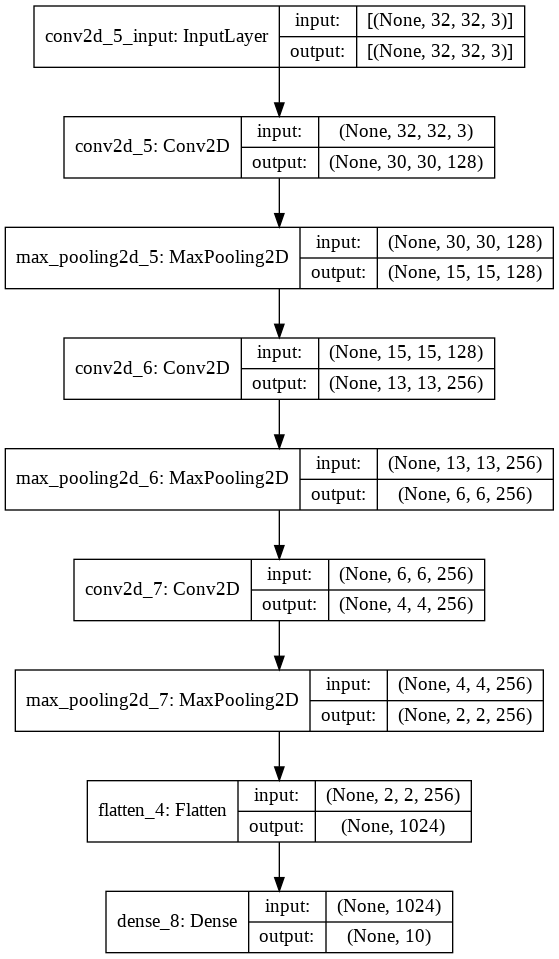

In [69]:
keras.utils.plot_model(experiment4, "exp4.png", show_shapes=True) 

In [70]:
experiment4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [71]:
start = time.process_time()

history_exp4 = experiment4.fit(train_images_norm
                    ,train_labels
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/20
92/92 [==============================] - 3s 32ms/step - loss: 1.7846 - accuracy: 0.3516 - val_loss: 1.4987 - val_accuracy: 0.4613
Epoch 2/20
92/92 [==============================] - 3s 29ms/step - loss: 1.3782 - accuracy: 0.5107 - val_loss: 1.2616 - val_accuracy: 0.5573
Epoch 3/20
92/92 [==============================] - 3s 29ms/step - loss: 1.2282 - accuracy: 0.5691 - val_loss: 1.1663 - val_accuracy: 0.5940
Epoch 4/20
92/92 [==============================] - 3s 28ms/step - loss: 1.1208 - accuracy: 0.6103 - val_loss: 1.0377 - val_accuracy: 0.6450
Epoch 5/20
92/92 [==============================] - 3s 29ms/step - loss: 1.0417 - accuracy: 0.6397 - val_loss: 1.0174 - val_accuracy: 0.6390
Epoch 6/20
92/92 [==============================] - 3s 29ms/step - loss: 0.9681 - accuracy: 0.6675 - val_loss: 0.9583 - val_accuracy: 0.6730
Epoch 7/20
92/92 [==============================] - 3s 29ms/step - loss: 0.9233 - accuracy: 0.6829 - val_loss: 0.9414 - val_accuracy: 0.6783
Epoch 8/20
92

In [72]:
loss, accuracy = experiment4.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp4loss = loss
exp4acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.8349 - accuracy: 0.7316
test set accuracy:  73.15999865531921


In [73]:
preds_exp4 = experiment4.predict(test_images_norm)
print('shape of preds: ', preds_exp4.shape)

shape of preds:  (10000, 10)


### Experiment 5
Experiment 1 with additions

Kernal, activity regularizers

In [74]:
experiment5 = models.Sequential()
#input layer/first dense layer
experiment5.add(layers.Dense(units = 128, activation = tf.nn.relu, input_shape=(32, 32, 3),
                             kernel_regularizer = regularizers.l1(1e-4), 
                             activity_regularizer = regularizers.l2(1e-5)))
#flatten input/first dense layer
experiment5.add(layers.Flatten())
#output layer
experiment5.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [75]:
experiment5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32, 32, 128)       512       
_________________________________________________________________
flatten_5 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1310730   
Total params: 1,311,242
Trainable params: 1,311,242
Non-trainable params: 0
_________________________________________________________________


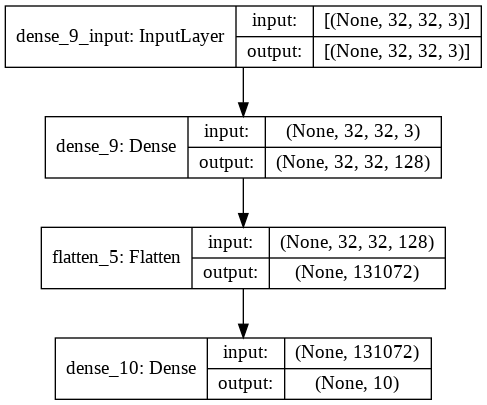

In [76]:
keras.utils.plot_model(experiment5, "exp5.png", show_shapes=True) 

In [77]:
experiment5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [78]:
start = time.process_time()

history_exp5 = experiment5.fit(train_images_norm
                    ,train_labels
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/20
92/92 [==============================] - 4s 38ms/step - loss: 2.0247 - accuracy: 0.3494 - val_loss: 1.5768 - val_accuracy: 0.4440
Epoch 2/20
92/92 [==============================] - 3s 36ms/step - loss: 1.5710 - accuracy: 0.4561 - val_loss: 1.5096 - val_accuracy: 0.4697
Epoch 3/20
92/92 [==============================] - 3s 36ms/step - loss: 1.5021 - accuracy: 0.4812 - val_loss: 1.4821 - val_accuracy: 0.4800
Epoch 4/20
92/92 [==============================] - 3s 36ms/step - loss: 1.4676 - accuracy: 0.4913 - val_loss: 1.4653 - val_accuracy: 0.4950
Epoch 5/20
92/92 [==============================] - 3s 36ms/step - loss: 1.4360 - accuracy: 0.5050 - val_loss: 1.4569 - val_accuracy: 0.4927
Epoch 6/20
92/92 [==============================] - 3s 36ms/step - loss: 1.4159 - accuracy: 0.5121 - val_loss: 1.4307 - val_accuracy: 0.5063
Epoch 7/20
92/92 [==============================] - 3s 36ms/step - loss: 1.3993 - accuracy: 0.5183 - val_loss: 1.4427 - val_accuracy: 0.4990
Epoch 8/20
92

In [79]:
loss, accuracy = experiment5.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp5loss = loss
exp5acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.4619 - accuracy: 0.4890
test set accuracy:  48.899999260902405


In [80]:
preds_exp5 = experiment5.predict(test_images_norm)
print('shape of preds: ', preds_exp5.shape)

shape of preds:  (10000, 10)


### Experiment 6
Experiment 4 with additions

Three convolutional layers + kernal, activity regularizers

In [81]:
experiment6 = models.Sequential()
#input layr and first convulutional layer
experiment6.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
experiment6.add(layers.MaxPool2D((2, 2),strides=2))
#second convulutional layer
experiment6.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, 
                              kernel_regularizer = regularizers.l1(1e-5), 
                              activity_regularizer = regularizers.l2(1e-6)))
experiment6.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#third convulutional layer
experiment6.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,
                              kernel_regularizer = regularizers.l1(1e-5), 
                              activity_regularizer = regularizers.l2(1e-6)))
experiment6.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#reshape before output layer
experiment6.add(layers.Flatten())
#output layer
experiment6.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [82]:
experiment6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)             

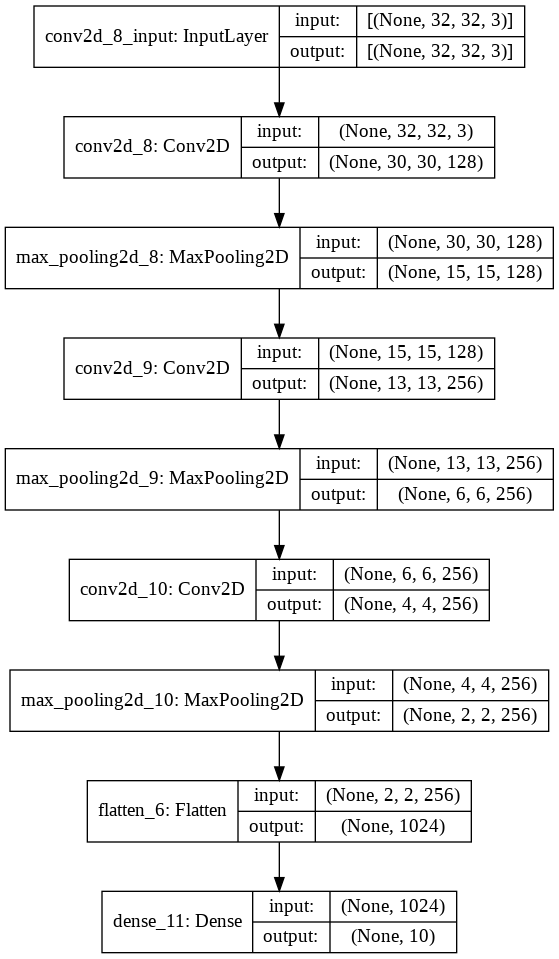

In [83]:
keras.utils.plot_model(experiment6, "exp6.png", show_shapes=True) 

In [84]:
experiment6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [85]:
start = time.process_time()

history_exp6 = experiment6.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 4s 34ms/step - loss: 1.8924 - accuracy: 0.3487 - val_loss: 1.5460 - val_accuracy: 0.4850
Epoch 2/200
92/92 [==============================] - 3s 32ms/step - loss: 1.4739 - accuracy: 0.5038 - val_loss: 1.3629 - val_accuracy: 0.5500
Epoch 3/200
92/92 [==============================] - 3s 32ms/step - loss: 1.3337 - accuracy: 0.5611 - val_loss: 1.2593 - val_accuracy: 0.5953
Epoch 4/200
92/92 [==============================] - 3s 32ms/step - loss: 1.2361 - accuracy: 0.5996 - val_loss: 1.1673 - val_accuracy: 0.6250
Epoch 5/200
92/92 [==============================] - 3s 32ms/step - loss: 1.1664 - accuracy: 0.6287 - val_loss: 1.1215 - val_accuracy: 0.6553
Epoch 6/200
92/92 [==============================] - 3s 32ms/step - loss: 1.1020 - accuracy: 0.6520 - val_loss: 1.0665 - val_accuracy: 0.6637
Epoch 7/200
92/92 [==============================] - 3s 32ms/step - loss: 1.0578 - accuracy: 0.6705 - val_loss: 1.0554 - val_accuracy: 0.6680
Epoch 

In [86]:
loss, accuracy = experiment6.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp6loss = loss
exp6acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.9941 - accuracy: 0.7065
test set accuracy:  70.6499993801117


In [87]:
preds_exp6 = experiment6.predict(test_images_norm)
print('shape of preds: ', preds_exp6.shape)

shape of preds:  (10000, 10)


### Experiment 7
Experiment 6 with additions

Learning rate optimization with ReduceLROnPlateau

In [88]:
experiment7 = models.Sequential()
#input layr and first convulutional layer
experiment7.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
experiment7.add(layers.MaxPool2D((2, 2),strides=2))
#second convulutional layer
experiment7.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, 
                              kernel_regularizer = regularizers.l1(1e-5), 
                              activity_regularizer = regularizers.l2(1e-6)))
experiment7.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#third convulutional layer
experiment7.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,
                              kernel_regularizer = regularizers.l1(1e-5), 
                              activity_regularizer = regularizers.l2(1e-6)))
experiment7.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#reshape before output layer
experiment7.add(layers.Flatten())
#output layer
experiment7.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [89]:
experiment7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)             

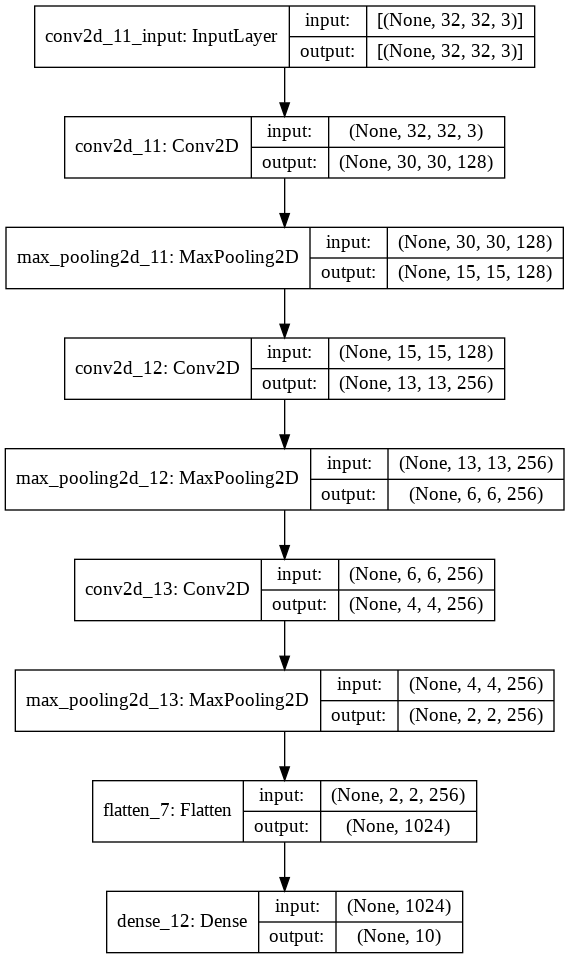

In [90]:
keras.utils.plot_model(experiment7, "exp7.png", show_shapes=True) 

In [91]:
experiment7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [92]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.0001)

In [93]:
start = time.process_time()

history_exp7 = experiment7.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 4s 34ms/step - loss: 1.9223 - accuracy: 0.3353 - val_loss: 1.5894 - val_accuracy: 0.4523
Epoch 2/200
92/92 [==============================] - 3s 32ms/step - loss: 1.4965 - accuracy: 0.4919 - val_loss: 1.3827 - val_accuracy: 0.5470
Epoch 3/200
92/92 [==============================] - 3s 32ms/step - loss: 1.3641 - accuracy: 0.5479 - val_loss: 1.2728 - val_accuracy: 0.5883
Epoch 4/200
92/92 [==============================] - 3s 32ms/step - loss: 1.2630 - accuracy: 0.5866 - val_loss: 1.2530 - val_accuracy: 0.5893
Epoch 5/200
92/92 [==============================] - 3s 32ms/step - loss: 1.1921 - accuracy: 0.6175 - val_loss: 1.1436 - val_accuracy: 0.6410
Epoch 6/200
92/92 [==============================] - 3s 32ms/step - loss: 1.1200 - accuracy: 0.6441 - val_loss: 1.0907 - val_accuracy: 0.6580
Epoch 7/200
92/92 [==============================] - 3s 32ms/step - loss: 1.0755 - accuracy: 0.6618 - val_loss: 1.0341 - val_accuracy: 0.6703
Epoch 

In [94]:
loss, accuracy = experiment7.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp7loss = loss
exp7acc = accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.9293 - accuracy: 0.7318
test set accuracy:  73.18000197410583


In [95]:
preds_exp7= experiment7.predict(test_images_norm)
print('shape of preds: ', preds_exp7.shape)

shape of preds:  (10000, 10)


### Experiment 8

Experiment 7 with additions

Updated kernal regularizer, added activity regularizer

In [96]:
experiment8 = models.Sequential()
#input layr and first convulutional layer
experiment8.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
experiment8.add(layers.MaxPool2D((2, 2),strides=2))
#second convulutional layer
experiment8.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, 
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment8.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#third convulutional layer
experiment8.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment8.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#reshape before output layer
experiment8.add(layers.Flatten())
#output layer
experiment8.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [97]:
experiment8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)             

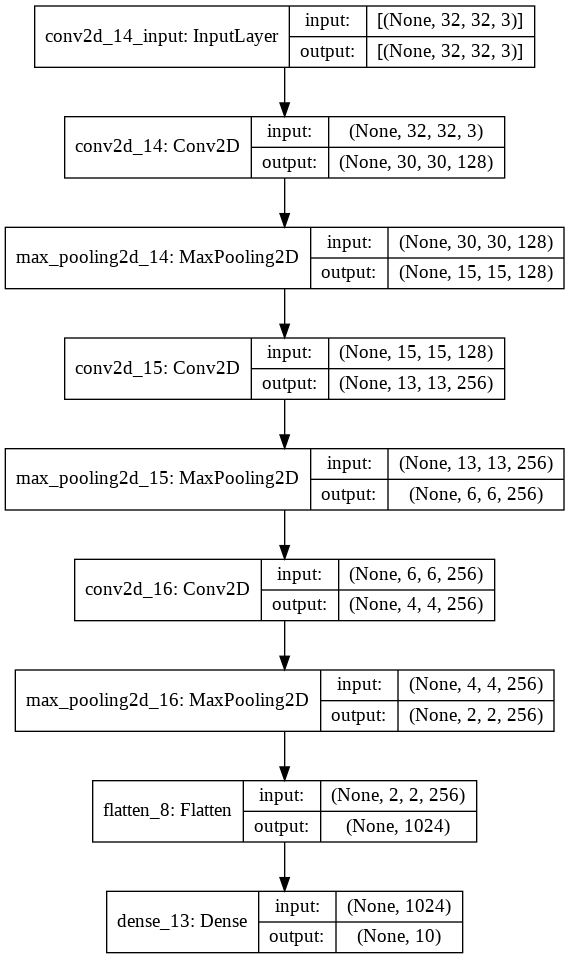

In [98]:
keras.utils.plot_model(experiment8, "exp8.png", show_shapes=True) 

In [99]:
experiment8.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [100]:
start = time.process_time()

history_exp8 = experiment8.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 4s 34ms/step - loss: 1.9125 - accuracy: 0.3493 - val_loss: 1.5754 - val_accuracy: 0.4730
Epoch 2/200
92/92 [==============================] - 3s 32ms/step - loss: 1.4965 - accuracy: 0.5004 - val_loss: 1.3751 - val_accuracy: 0.5577
Epoch 3/200
92/92 [==============================] - 3s 32ms/step - loss: 1.3583 - accuracy: 0.5630 - val_loss: 1.3641 - val_accuracy: 0.5587
Epoch 4/200
92/92 [==============================] - 3s 32ms/step - loss: 1.2721 - accuracy: 0.5983 - val_loss: 1.2048 - val_accuracy: 0.6197
Epoch 5/200
92/92 [==============================] - 3s 32ms/step - loss: 1.1862 - accuracy: 0.6330 - val_loss: 1.1299 - val_accuracy: 0.6463
Epoch 6/200
92/92 [==============================] - 3s 32ms/step - loss: 1.1313 - accuracy: 0.6533 - val_loss: 1.1269 - val_accuracy: 0.6483
Epoch 7/200
92/92 [==============================] - 3s 32ms/step - loss: 1.0790 - accuracy: 0.6749 - val_loss: 1.0570 - val_accuracy: 0.6757
Epoch 

In [101]:
loss, accuracy = experiment8.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp8loss = loss
exp8acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.9736 - accuracy: 0.7420
test set accuracy:  74.19999837875366


In [102]:
preds_exp8 = experiment8.predict(test_images_norm)
print('shape of preds: ', preds_exp8.shape)

shape of preds:  (10000, 10)


In [103]:
history_exp8.history.keys

<function dict.keys>

### Experiment 9

Experiment 4 with LR for benchmark

In [104]:
experiment9 = models.Sequential()
#input layr and first convulutional layer
experiment9.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
experiment9.add(layers.MaxPool2D((2, 2),strides=2))
#second convulutional layer
experiment9.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
experiment9.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#third convulutional layer
experiment9.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
experiment9.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#reshape before output layer
experiment9.add(layers.Flatten())
#output layer
experiment9.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [105]:
experiment9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)             

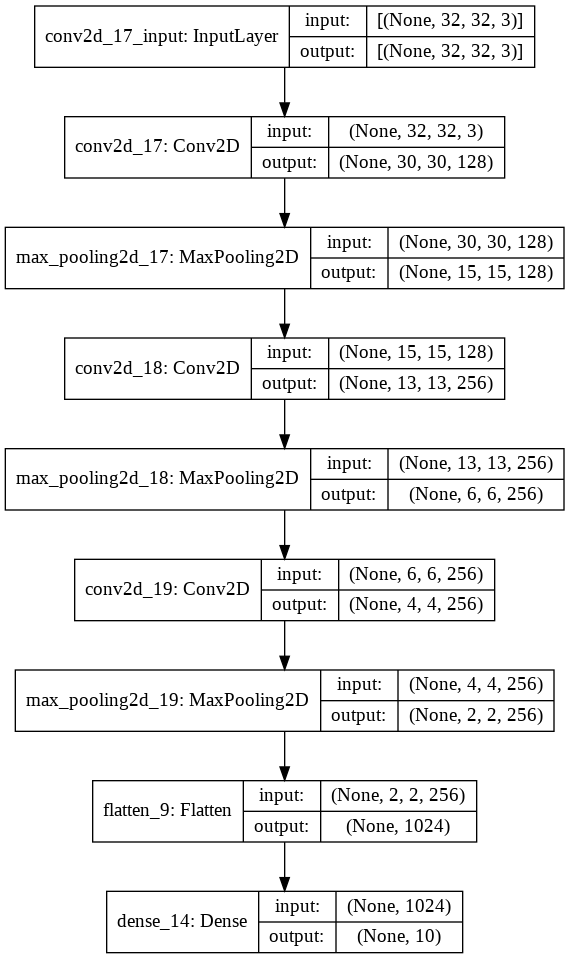

In [106]:
keras.utils.plot_model(experiment9, "exp9.png", show_shapes=True) 

In [107]:
experiment9.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [108]:
start = time.process_time()

history_exp9 = experiment9.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 3s 30ms/step - loss: 1.8214 - accuracy: 0.3369 - val_loss: 1.4953 - val_accuracy: 0.4683
Epoch 2/200
92/92 [==============================] - 3s 29ms/step - loss: 1.4176 - accuracy: 0.4954 - val_loss: 1.2981 - val_accuracy: 0.5470
Epoch 3/200
92/92 [==============================] - 3s 28ms/step - loss: 1.2651 - accuracy: 0.5566 - val_loss: 1.1870 - val_accuracy: 0.5883
Epoch 4/200
92/92 [==============================] - 3s 29ms/step - loss: 1.1618 - accuracy: 0.5948 - val_loss: 1.1414 - val_accuracy: 0.6067
Epoch 5/200
92/92 [==============================] - 3s 28ms/step - loss: 1.0736 - accuracy: 0.6293 - val_loss: 1.0153 - val_accuracy: 0.6443
Epoch 6/200
92/92 [==============================] - 3s 29ms/step - loss: 1.0061 - accuracy: 0.6544 - val_loss: 0.9886 - val_accuracy: 0.6570
Epoch 7/200
92/92 [==============================] - 3s 29ms/step - loss: 0.9515 - accuracy: 0.6722 - val_loss: 0.9534 - val_accuracy: 0.6617
Epoch 

In [109]:
loss, accuracy = experiment9.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp9loss = loss
exp9acc = accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.8268 - accuracy: 0.7327
test set accuracy:  73.2699990272522


In [110]:
preds_exp9 = experiment9.predict(test_images_norm)
print('shape of preds: ', preds_exp9.shape)

shape of preds:  (10000, 10)


### Experiment 10

Experiment 8 with additions

Second convolutional layer increased to 512 filters from 256

Same padding added to each layer

In [111]:
experiment10 = models.Sequential()
#input layr and first convulutional layer
experiment10.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3), padding = "same"))
experiment10.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
#second convulutional layer
experiment10.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment10.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#third convulutional layer
experiment10.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment10.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
#reshape before output layer
experiment10.add(layers.Flatten())
#output layer
experiment10.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [112]:
experiment10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 512)         1180160   
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 512)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)            

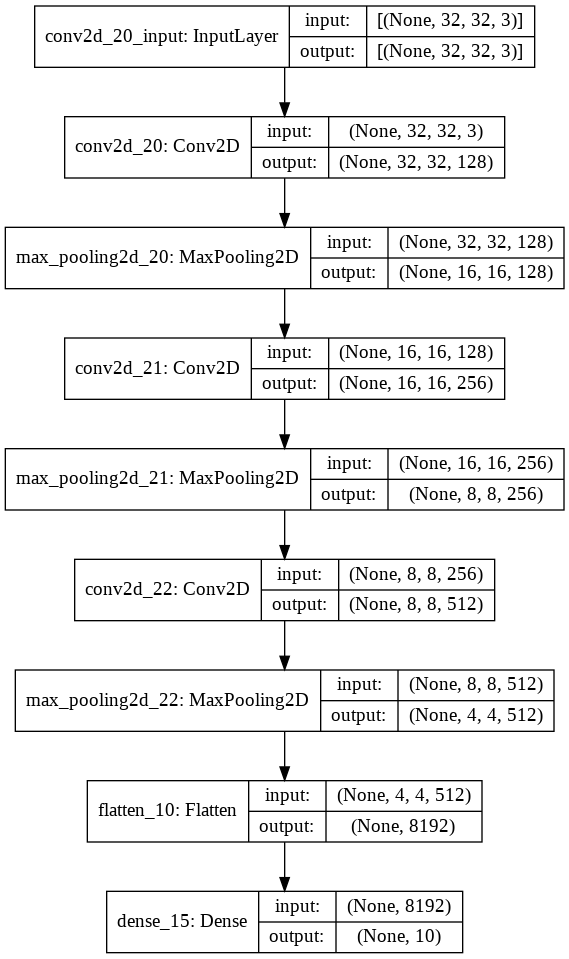

In [113]:
keras.utils.plot_model(experiment10, "exp10.png", show_shapes=True) 

In [114]:
experiment10.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [115]:
start = time.process_time()

history_exp10 = experiment10.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 7s 63ms/step - loss: 1.8685 - accuracy: 0.3829 - val_loss: 1.5384 - val_accuracy: 0.4887
Epoch 2/200
92/92 [==============================] - 4s 45ms/step - loss: 1.4287 - accuracy: 0.5353 - val_loss: 1.3217 - val_accuracy: 0.5770
Epoch 3/200
92/92 [==============================] - 4s 45ms/step - loss: 1.2492 - accuracy: 0.6101 - val_loss: 1.1795 - val_accuracy: 0.6353
Epoch 4/200
92/92 [==============================] - 4s 46ms/step - loss: 1.1246 - accuracy: 0.6589 - val_loss: 1.0692 - val_accuracy: 0.6767
Epoch 5/200
92/92 [==============================] - 4s 45ms/step - loss: 1.0370 - accuracy: 0.6943 - val_loss: 1.0410 - val_accuracy: 0.6873
Epoch 6/200
92/92 [==============================] - 4s 45ms/step - loss: 0.9691 - accuracy: 0.7208 - val_loss: 0.9654 - val_accuracy: 0.7177
Epoch 7/200
92/92 [==============================] - 4s 45ms/step - loss: 0.9277 - accuracy: 0.7340 - val_loss: 0.9532 - val_accuracy: 0.7290
Epoch 

In [116]:
loss, accuracy = experiment10.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp10loss = loss
exp10acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.8672 - accuracy: 0.7858
test set accuracy:  78.57999801635742


In [117]:
preds_exp10 = experiment10.predict(test_images_norm)
print('shape of preds: ', preds_exp10.shape)

shape of preds:  (10000, 10)


### Experiment 11

Experiment 10 with additions

Dropout layer (0.2) added after each convolutional layer

In [118]:
experiment11 = models.Sequential()
#input layr and first convulutional layer
experiment11.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3), padding = "same"))
experiment11.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
experiment11.add(Dropout(0.2))
#second convulutional layer
experiment11.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment11.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment11.add(Dropout(0.2))
#third convulutional layer
experiment11.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment11.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
experiment11.add(Dropout(0.2))
#reshape before output layer
experiment11.add(layers.Flatten())
#output layer
experiment11.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [119]:
experiment11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 512)       

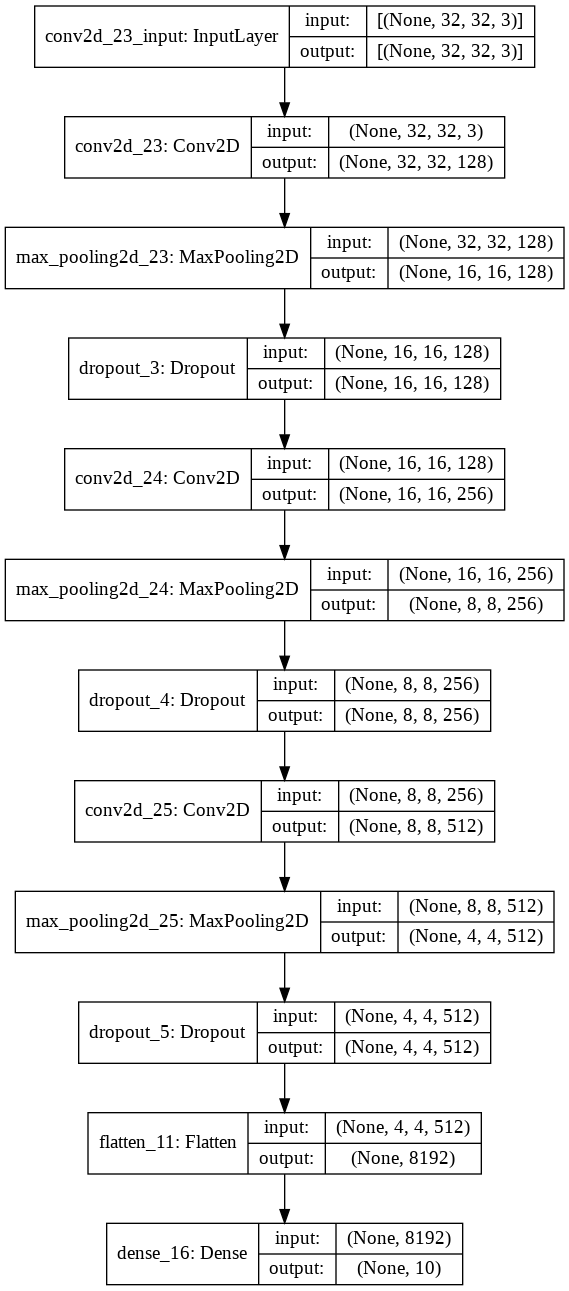

In [120]:
keras.utils.plot_model(experiment11, "exp11.png", show_shapes=True) 

In [121]:
experiment11.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [122]:
start = time.process_time()

history_exp11 = experiment11.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 5s 51ms/step - loss: 1.9603 - accuracy: 0.3535 - val_loss: 1.5847 - val_accuracy: 0.4703
Epoch 2/200
92/92 [==============================] - 5s 49ms/step - loss: 1.4931 - accuracy: 0.5066 - val_loss: 1.3375 - val_accuracy: 0.5783
Epoch 3/200
92/92 [==============================] - 5s 49ms/step - loss: 1.3130 - accuracy: 0.5804 - val_loss: 1.1927 - val_accuracy: 0.6260
Epoch 4/200
92/92 [==============================] - 5s 49ms/step - loss: 1.2170 - accuracy: 0.6163 - val_loss: 1.1319 - val_accuracy: 0.6590
Epoch 5/200
92/92 [==============================] - 5s 50ms/step - loss: 1.1249 - accuracy: 0.6539 - val_loss: 1.0424 - val_accuracy: 0.6833
Epoch 6/200
92/92 [==============================] - 5s 49ms/step - loss: 1.0554 - accuracy: 0.6799 - val_loss: 1.0010 - val_accuracy: 0.7083
Epoch 7/200
92/92 [==============================] - 5s 49ms/step - loss: 1.0076 - accuracy: 0.6999 - val_loss: 0.9463 - val_accuracy: 0.7287
Epoch 

In [123]:
loss, accuracy = experiment11.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp11loss = loss
exp11acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.7895 - accuracy: 0.8016
test set accuracy:  80.15999794006348


In [124]:
preds_exp11 = experiment11.predict(test_images_norm)
print('shape of preds: ', preds_exp11.shape)

shape of preds:  (10000, 10)


### Experiment 12

Experiment 11 with additions

Steadily increased dropout from to 0.2, 0.3, 0.4 sequentially

In [125]:
experiment12 = models.Sequential()
#input layr and first convulutional layer
experiment12.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu6, input_shape=(32, 32, 3), padding = "same"))
experiment12.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
experiment12.add(Dropout(0.2))
#second convulutional layer
experiment12.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment12.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment12.add(Dropout(0.3))
#third convulutional layer
experiment12.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment12.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
experiment12.add(Dropout(0.4))
#reshape before output layer
experiment12.add(layers.Flatten())
#output layer
experiment12.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [126]:
experiment12.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 512)       

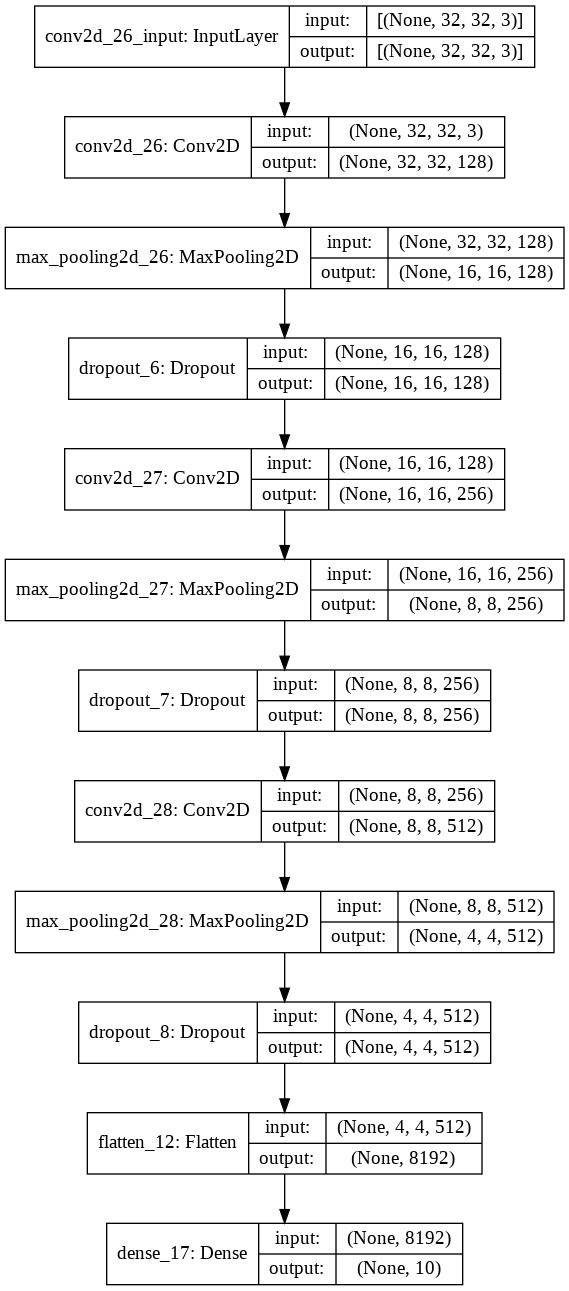

In [127]:
keras.utils.plot_model(experiment12, "exp12.png", show_shapes=True) 

In [128]:
experiment12.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [129]:
start = time.process_time()

history_exp12 = experiment12.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 6s 55ms/step - loss: 1.9528 - accuracy: 0.3513 - val_loss: 1.5738 - val_accuracy: 0.4757
Epoch 2/200
92/92 [==============================] - 5s 52ms/step - loss: 1.5023 - accuracy: 0.5070 - val_loss: 1.3567 - val_accuracy: 0.5783
Epoch 3/200
92/92 [==============================] - 5s 52ms/step - loss: 1.3282 - accuracy: 0.5782 - val_loss: 1.2368 - val_accuracy: 0.6167
Epoch 4/200
92/92 [==============================] - 5s 52ms/step - loss: 1.2381 - accuracy: 0.6129 - val_loss: 1.1233 - val_accuracy: 0.6673
Epoch 5/200
92/92 [==============================] - 5s 52ms/step - loss: 1.1508 - accuracy: 0.6467 - val_loss: 1.0504 - val_accuracy: 0.6887
Epoch 6/200
92/92 [==============================] - 5s 52ms/step - loss: 1.0827 - accuracy: 0.6749 - val_loss: 1.0040 - val_accuracy: 0.7063
Epoch 7/200
92/92 [==============================] - 5s 52ms/step - loss: 1.0470 - accuracy: 0.6907 - val_loss: 0.9877 - val_accuracy: 0.7073
Epoch 

In [130]:
loss, accuracy = experiment12.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp12loss = loss
exp12acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.7523 - accuracy: 0.8116
test set accuracy:  81.16000294685364


In [131]:
preds_exp12 = experiment12.predict(test_images_norm)
print('shape of preds: ', preds_exp12.shape)

shape of preds:  (10000, 10)


### Experiment 13

Experiment 12 with additions

switched to relu6 activation function for all convolutional layers

In [132]:
experiment13 = models.Sequential()
#input layr and first convulutional layer
experiment13.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu6, input_shape=(32, 32, 3), padding = "same"))
experiment13.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
experiment13.add(Dropout(0.2))
#second convulutional layer
experiment13.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu6, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment13.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment13.add(Dropout(0.3))
#third convulutional layer
experiment13.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu6, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment13.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
experiment13.add(Dropout(0.4))
#reshape before output layer
experiment13.add(layers.Flatten())
#output layer
experiment13.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [133]:
experiment13.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 512)       

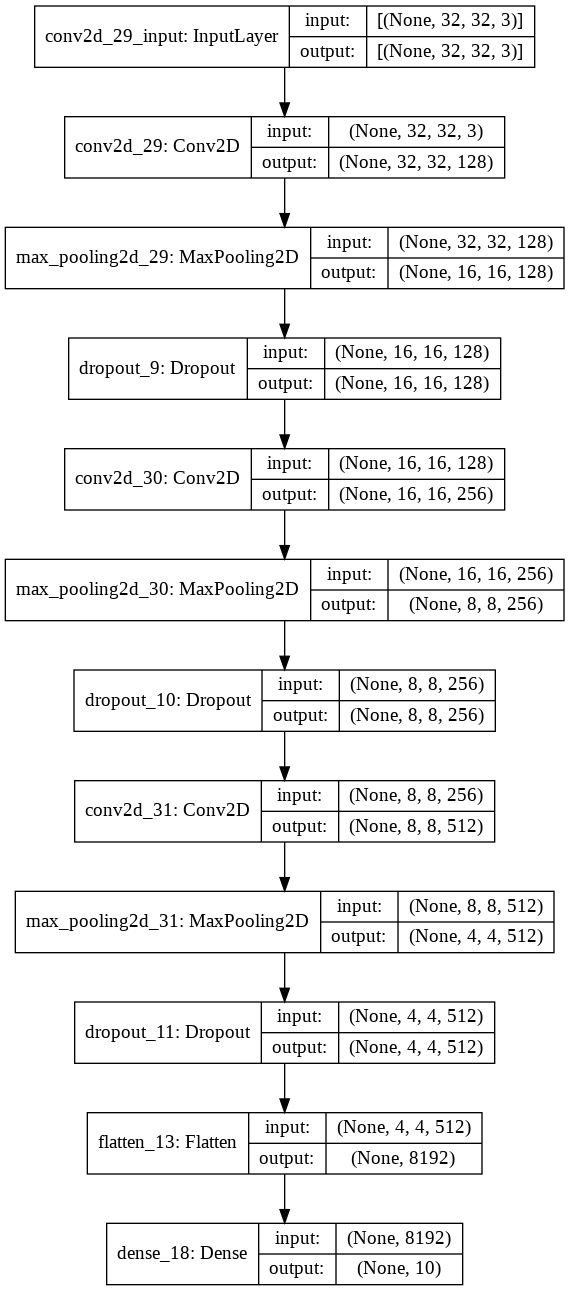

In [134]:
keras.utils.plot_model(experiment13, "exp13.png", show_shapes=True) 

In [135]:
experiment13.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [136]:
start = time.process_time()

history_exp13 = experiment13.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 6s 62ms/step - loss: 1.9740 - accuracy: 0.3449 - val_loss: 1.6094 - val_accuracy: 0.4700
Epoch 2/200
92/92 [==============================] - 5s 54ms/step - loss: 1.5183 - accuracy: 0.4956 - val_loss: 1.3534 - val_accuracy: 0.5570
Epoch 3/200
92/92 [==============================] - 5s 54ms/step - loss: 1.3500 - accuracy: 0.5640 - val_loss: 1.2116 - val_accuracy: 0.6287
Epoch 4/200
92/92 [==============================] - 5s 54ms/step - loss: 1.2239 - accuracy: 0.6094 - val_loss: 1.1084 - val_accuracy: 0.6607
Epoch 5/200
92/92 [==============================] - 5s 54ms/step - loss: 1.1475 - accuracy: 0.6412 - val_loss: 1.0959 - val_accuracy: 0.6647
Epoch 6/200
92/92 [==============================] - 5s 54ms/step - loss: 1.0881 - accuracy: 0.6661 - val_loss: 1.0166 - val_accuracy: 0.6970
Epoch 7/200
92/92 [==============================] - 5s 54ms/step - loss: 1.0279 - accuracy: 0.6903 - val_loss: 0.9763 - val_accuracy: 0.7127
Epoch 

In [137]:
loss, accuracy = experiment13.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp13loss = loss
exp13acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.7290 - accuracy: 0.8086
test set accuracy:  80.86000084877014


In [138]:
preds_exp13 = experiment13.predict(test_images_norm)
print('shape of preds: ', preds_exp13.shape)

shape of preds:  (10000, 10)


### Experiment 14

Experiment 13 with deletions

Filters decreased 128->64, 256->128, 512->256

Relu6 activation for only the first layer

In [139]:
experiment14 = models.Sequential()
#input layr and first convulutional layer
experiment14.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu6, input_shape=(32, 32, 3), padding = "same"))
experiment14.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
experiment14.add(Dropout(0.2))
#second convulutional layer
experiment14.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment14.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment14.add(Dropout(0.3))
#third convulutional layer
experiment14.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment14.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
experiment14.add(Dropout(0.4))
#reshape before output layer
experiment14.add(layers.Flatten())
#output layer
experiment14.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [140]:
experiment14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 256)       

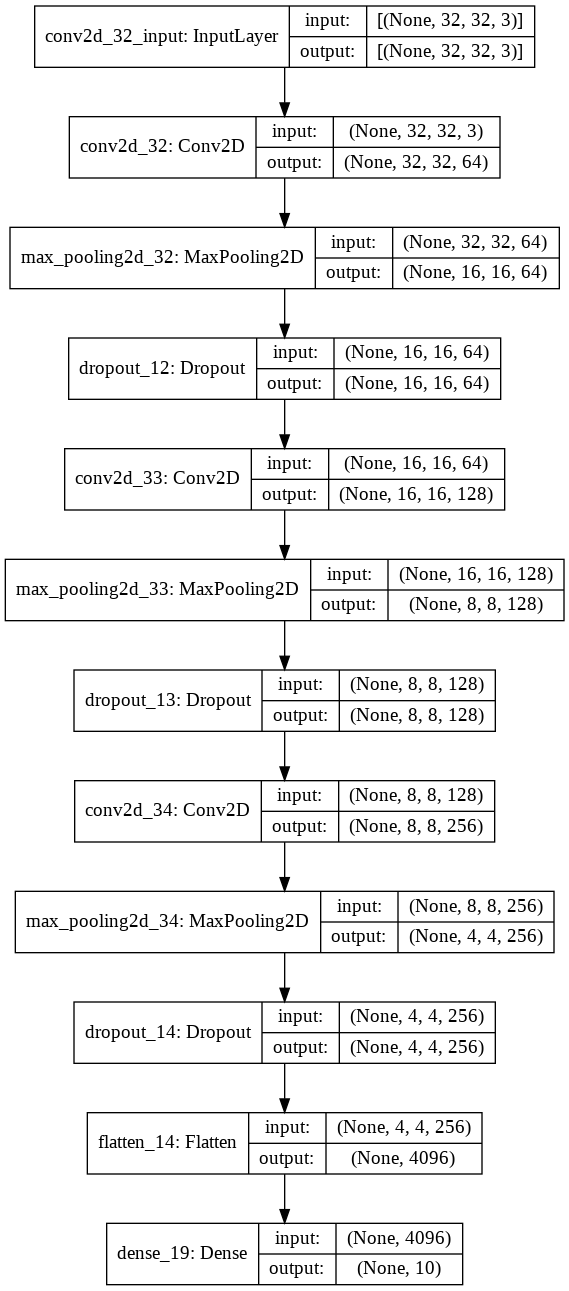

In [141]:
keras.utils.plot_model(experiment14, "exp14.png", show_shapes=True) 

In [142]:
experiment14.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [143]:
start = time.process_time()

history_exp14 = experiment14.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 4s 32ms/step - loss: 1.9298 - accuracy: 0.3301 - val_loss: 1.5907 - val_accuracy: 0.4477
Epoch 2/200
92/92 [==============================] - 2s 26ms/step - loss: 1.5338 - accuracy: 0.4783 - val_loss: 1.4006 - val_accuracy: 0.5343
Epoch 3/200
92/92 [==============================] - 2s 26ms/step - loss: 1.3893 - accuracy: 0.5373 - val_loss: 1.2687 - val_accuracy: 0.5797
Epoch 4/200
92/92 [==============================] - 2s 26ms/step - loss: 1.2901 - accuracy: 0.5754 - val_loss: 1.1720 - val_accuracy: 0.6383
Epoch 5/200
92/92 [==============================] - 2s 26ms/step - loss: 1.2188 - accuracy: 0.6029 - val_loss: 1.1263 - val_accuracy: 0.6480
Epoch 6/200
92/92 [==============================] - 2s 26ms/step - loss: 1.1583 - accuracy: 0.6279 - val_loss: 1.0630 - val_accuracy: 0.6750
Epoch 7/200
92/92 [==============================] - 2s 26ms/step - loss: 1.1050 - accuracy: 0.6486 - val_loss: 0.9954 - val_accuracy: 0.6970
Epoch 

In [144]:
loss, accuracy = experiment14.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp14loss = loss
exp14acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.7067 - accuracy: 0.8058
test set accuracy:  80.58000206947327


In [145]:
preds_exp14 = experiment14.predict(test_images_norm)
print('shape of preds: ', preds_exp14.shape)

shape of preds:  (10000, 10)


### Experiment 15

Experiment 14 with single change

Optimizer switched from adam to nadam

In [238]:
experiment15 = models.Sequential()
#input layr and first convulutional layer
experiment15.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu6, input_shape=(32, 32, 3), padding = "same"))
experiment15.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
experiment15.add(Dropout(0.2))
#second convulutional layer
experiment15.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment15.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment15.add(Dropout(0.3))
#third convulutional layer
experiment15.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment15.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
experiment15.add(Dropout(0.4))
#reshape before output layer
experiment15.add(layers.Flatten())
#output layer
experiment15.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [239]:
experiment15.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 256)       

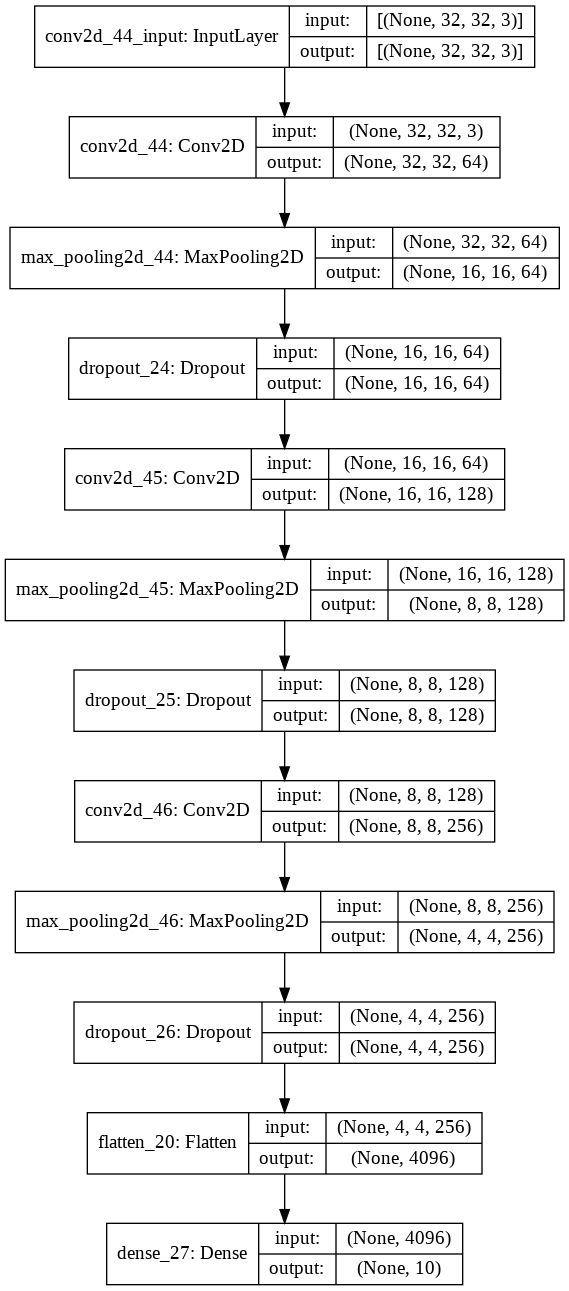

In [240]:
keras.utils.plot_model(experiment15, "exp15.png", show_shapes=True) 

In [241]:
# opt = tf.keras.optimizers.Nadam(learning_rate=1e-4)

experiment15.compile(optimizer= 'nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [242]:
start = time.process_time()

history_exp15 = experiment15.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 4s 28ms/step - loss: 2.0535 - accuracy: 0.2949 - val_loss: 1.7567 - val_accuracy: 0.4237
Epoch 2/200
92/92 [==============================] - 2s 26ms/step - loss: 1.6712 - accuracy: 0.4341 - val_loss: 1.5747 - val_accuracy: 0.4873
Epoch 3/200
92/92 [==============================] - 2s 26ms/step - loss: 1.4870 - accuracy: 0.5050 - val_loss: 1.3321 - val_accuracy: 0.5733
Epoch 4/200
92/92 [==============================] - 2s 26ms/step - loss: 1.3692 - accuracy: 0.5543 - val_loss: 1.4836 - val_accuracy: 0.5150
Epoch 5/200
92/92 [==============================] - 2s 26ms/step - loss: 1.2809 - accuracy: 0.5874 - val_loss: 1.3421 - val_accuracy: 0.5790
Epoch 6/200
92/92 [==============================] - 2s 26ms/step - loss: 1.1455 - accuracy: 0.6391 - val_loss: 1.0537 - val_accuracy: 0.6813
Epoch 7/200
92/92 [==============================] - 2s 26ms/step - loss: 1.1081 - accuracy: 0.6537 - val_loss: 1.0100 - val_accuracy: 0.6993
Epoch 

In [243]:
loss, accuracy = experiment15.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp15loss = loss
exp15acc = accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.7358 - accuracy: 0.7973
test set accuracy:  79.72999811172485


In [244]:
preds_exp15 = experiment15.predict(test_images_norm)
print('shape of preds: ', preds_exp15.shape)

shape of preds:  (10000, 10)


### Experiment 16: Final

Experiment 13 with additions

(relu6 removed due to improper backend handling)

Optimizer as nadam

In [153]:
experiment16 = models.Sequential()
#input layr and first convulutional layer
experiment16.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3), padding = "same"))
experiment16.add(layers.MaxPool2D((2, 2),strides=2, padding = "same"))
experiment16.add(Dropout(0.2))
#second convulutional layer
experiment16.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment16.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment16.add(Dropout(0.3))
#third convulutional layer
experiment16.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, padding = "same",
                              kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),
                              activity_regularizer=regularizers.l2(1e-5)))
experiment16.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, padding = "same"))
experiment16.add(Dropout(0.4))
#reshape before output layer
experiment16.add(layers.Flatten())
#output layer
experiment16.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [154]:
experiment16.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 512)       

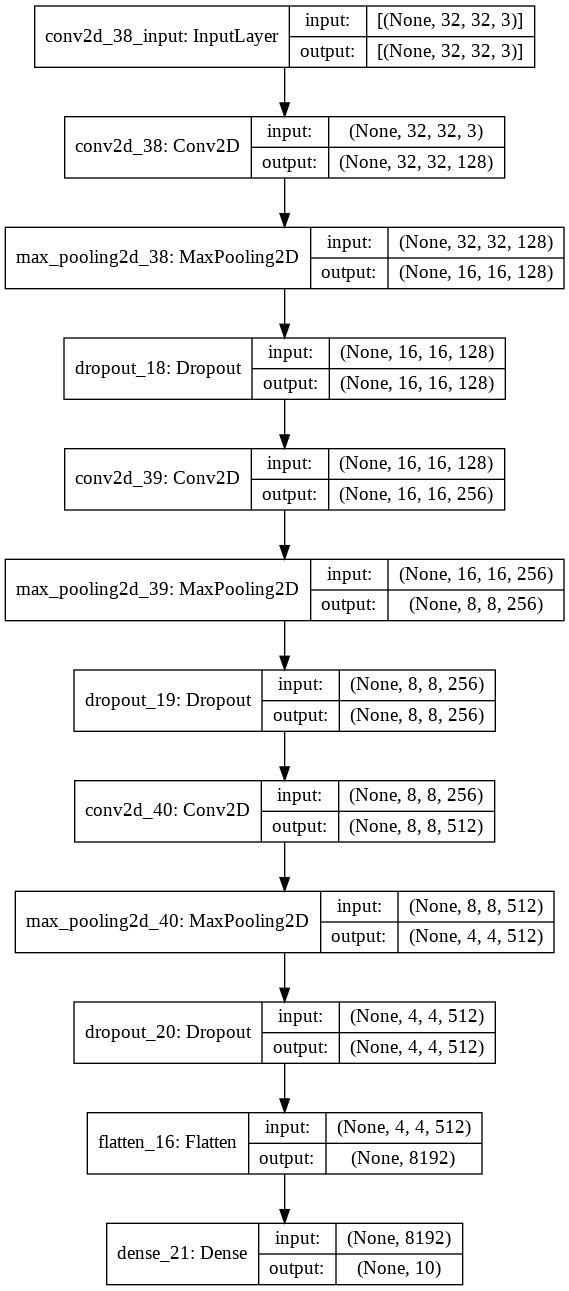

In [155]:
keras.utils.plot_model(experiment16, "exp16.png", show_shapes=True) 

In [156]:
experiment16.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [157]:
start = time.process_time()

history_exp16 = experiment16.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    reduce_lr,
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/exp16_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')])

stop = time.process_time()
runtime = stop - start
train_times.append(runtime)

Epoch 1/200
92/92 [==============================] - 6s 52ms/step - loss: 2.2136 - accuracy: 0.2773 - val_loss: 1.8733 - val_accuracy: 0.3840
Epoch 2/200
92/92 [==============================] - 5s 50ms/step - loss: 1.7228 - accuracy: 0.4402 - val_loss: 1.5807 - val_accuracy: 0.4923
Epoch 3/200
92/92 [==============================] - 5s 50ms/step - loss: 1.4870 - accuracy: 0.5257 - val_loss: 1.3967 - val_accuracy: 0.5500
Epoch 4/200
92/92 [==============================] - 5s 50ms/step - loss: 1.3448 - accuracy: 0.5805 - val_loss: 1.3062 - val_accuracy: 0.5927
Epoch 5/200
92/92 [==============================] - 5s 50ms/step - loss: 1.2375 - accuracy: 0.6226 - val_loss: 1.1860 - val_accuracy: 0.6340
Epoch 6/200
92/92 [==============================] - 5s 50ms/step - loss: 1.1684 - accuracy: 0.6520 - val_loss: 1.0612 - val_accuracy: 0.6873
Epoch 7/200
92/92 [==============================] - 5s 50ms/step - loss: 1.1084 - accuracy: 0.6747 - val_loss: 0.9867 - val_accuracy: 0.7287
Epoch 

In [158]:
loss, accuracy = experiment16.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
exp16loss = loss
exp16acc = accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.7473 - accuracy: 0.8151
test set accuracy:  81.51000142097473


In [159]:
preds_exp16 = experiment16.predict(test_images_norm)
print('shape of preds: ', preds_exp16.shape)

shape of preds:  (10000, 10)


## Plotting Best Experiment

In [160]:
history_dict = history_exp16.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [161]:
history_df=pd.DataFrame(history_dict)
history_df.tail(1).round(3)

loss  accuracy  val_loss  val_accuracy   lr
48  0.536     0.889     0.696         0.828  0.0

In [162]:
losses = history_exp16.history['loss']
accs = history_exp16.history['accuracy']
val_losses = history_exp16.history['val_loss']
val_accs = history_exp16.history['val_accuracy']
epochs = len(losses)

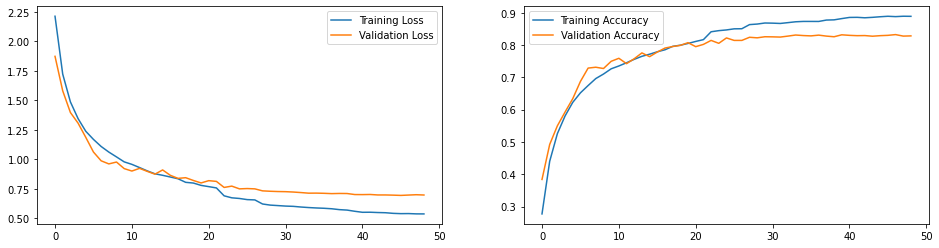

In [163]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Result 1: Experimental Results

In [164]:
history_df = pd.DataFrame(history_exp1.history)
history_df = pd.DataFrame(history_df.tail(1).round(3))
#exp 2
history_exp2_df = pd.DataFrame(history_exp2.history)
history_exp2_df = pd.DataFrame(history_exp2_df.tail(1).round(3))
history_df = history_df.append(history_exp2_df)
#exp 3
history_exp3_df = pd.DataFrame(history_exp3.history)
history_exp3_df = pd.DataFrame(history_exp3_df.tail(1).round(3))
history_df = history_df.append(history_exp3_df)
#exp 4
history_exp4_df = pd.DataFrame(history_exp4.history)
history_exp4_df = pd.DataFrame(history_exp4_df.tail(1).round(3))
history_df = history_df.append(history_exp4_df)
#exp 5
history_exp5_df = pd.DataFrame(history_exp5.history)
history_exp5_df = pd.DataFrame(history_exp5_df.tail(1).round(3))
history_df = history_df.append(history_exp5_df)
#exp 6
history_exp6_df = pd.DataFrame(history_exp6.history)
history_exp6_df = pd.DataFrame(history_exp6_df.tail(1).round(3))
history_df = history_df.append(history_exp6_df)
#exp 7
history_exp7_df = pd.DataFrame(history_exp7.history)
history_exp7_df = pd.DataFrame(history_exp7_df.tail(1).round(3))
history_df = history_df.append(history_exp7_df)
#exp 8
history_exp8_df = pd.DataFrame(history_exp8.history)
history_exp8_df = pd.DataFrame(history_exp8_df.tail(1).round(3))
history_df = history_df.append(history_exp8_df)
#exp 9
history_exp9_df = pd.DataFrame(history_exp9.history)
history_exp9_df = pd.DataFrame(history_exp9_df.tail(1).round(3))
history_df = history_df.append(history_exp9_df)
#exp 10
history_exp10_df = pd.DataFrame(history_exp10.history)
history_exp10_df = pd.DataFrame(history_exp10_df.tail(1).round(3))
history_df = history_df.append(history_exp10_df)
#exp 11
history_exp11_df = pd.DataFrame(history_exp11.history)
history_exp11_df = pd.DataFrame(history_exp11_df.tail(1).round(3))
history_df = history_df.append(history_exp11_df)
#exp 12
history_exp12_df = pd.DataFrame(history_exp12.history)
history_exp12_df = pd.DataFrame(history_exp12_df.tail(1).round(3))
history_df = history_df.append(history_exp12_df)
#exp 13
history_exp13_df = pd.DataFrame(history_exp13.history)
history_exp13_df = pd.DataFrame(history_exp13_df.tail(1).round(3))
history_df = history_df.append(history_exp13_df)
#exp 14
history_exp14_df = pd.DataFrame(history_exp14.history)
history_exp14_df = pd.DataFrame(history_exp14_df.tail(1).round(3))
history_df = history_df.append(history_exp14_df)
#exp 15
history_exp15_df = pd.DataFrame(history_exp15.history)
history_exp15_df = pd.DataFrame(history_exp15_df.tail(1).round(3))
history_df = history_df.append(history_exp15_df)
#exp 16
history_exp16_df = pd.DataFrame(history_exp16.history)
history_exp16_df = pd.DataFrame(history_exp16_df.tail(1).round(3))
history_df = history_df.append(history_exp16_df)

In [216]:
history_df

loss  accuracy  val_loss  val_accuracy     lr  trainingTime(s)
12  1.295     0.553     1.432         0.504    NaN            31.89
8   1.223     0.579     1.412         0.513    NaN            51.55
19  0.617     0.790     0.789         0.731    NaN            45.63
19  0.466     0.845     0.786         0.738    NaN            52.53
8   1.364     0.530     1.446         0.498    NaN            29.28
14  0.779     0.775     0.948         0.711    NaN            45.21
28  0.549     0.864     0.864         0.752  0.000            86.05
23  0.600     0.872     0.927         0.748  0.001            71.48
29  0.422     0.866     0.763         0.744  0.000            77.46
22  0.422     0.946     0.822         0.797  0.000            92.27
32  0.527     0.890     0.735         0.813  0.000           131.05
39  0.612     0.857     0.707         0.825  0.000           164.20
61  0.585     0.859     0.686         0.815  0.000           254.73
56  0.617     0.836     0.671         0.819  0.000           135.47
59  0.636     0.832     0.687         0.821  0.000           148.30
48  0.536     0.889     0.696         0.828  0.000           199.00

In [217]:
times = np.zeros(16)
for i in range(0, len(train_times)):
  times[i] = round(train_times[i],2)

In [218]:
history_df['trainingTime(s)'] = times

In [219]:
history_df.drop(columns = ['lr'])

loss  accuracy  val_loss  val_accuracy  trainingTime(s)
12  1.295     0.553     1.432         0.504            31.89
8   1.223     0.579     1.412         0.513            51.55
19  0.617     0.790     0.789         0.731            45.63
19  0.466     0.845     0.786         0.738            52.53
8   1.364     0.530     1.446         0.498            29.28
14  0.779     0.775     0.948         0.711            45.21
28  0.549     0.864     0.864         0.752            86.05
23  0.600     0.872     0.927         0.748            71.48
29  0.422     0.866     0.763         0.744            77.46
22  0.422     0.946     0.822         0.797            92.27
32  0.527     0.890     0.735         0.813           131.05
39  0.612     0.857     0.707         0.825           164.20
61  0.585     0.859     0.686         0.815           254.73
56  0.617     0.836     0.671         0.819           135.47
59  0.636     0.832     0.687         0.821           148.30
48  0.536     0.889     0.696         0.828           199.00

In [235]:
condensed = history_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],:]

In [236]:
condensed = condensed.reset_index().drop(columns = ['lr'])

In [237]:
model = ["Dense 128","Dense 128 256", "CNN 128 256", "CNN 128 256 256",
         "Dense 128", "CNN 128 256 256", "CNN 128 256 256", "CNN 128 256 256",
         "CNN 128 256 256", "CNN 128 256 512", "CNN 128 256 512", "CNN 128 256 512",
         "CNN 128 256 512", "CNN 64 128 256", "CNN 64 128 256", "CNN 128 256 512"]
description = ["basic", "added dense layer", "maxpooling", "added CNN layer",
               "kernal+activity reg", "kernal+activity reg", "LR opt", "reg vals updated",
               "benchmark", "padding + filters", "dropout", "dropout adjusted",
               "relu6", "decreased filters", "nadam opt", "relu6 dropped"]
test_accuracy = [exp1acc, exp2acc, exp3acc, exp4acc,
              exp5acc, exp6acc, exp7acc, exp8acc,
              exp9acc, exp10acc, exp11acc, exp12acc,
              exp13acc, exp14acc, exp15acc, exp16acc]

test_loss = [exp1loss, exp2loss, exp3loss, exp4loss,
              exp5loss, exp6loss, exp7loss, exp8loss,
              exp9loss, exp10loss, exp11loss, exp12loss,
              exp13loss, exp14loss, exp15loss, exp16loss]

condensed.insert(0, "model", model, allow_duplicates=True)
condensed.insert(1, "description", description, allow_duplicates=True)
condensed.insert(8, "test accuracy", test_accuracy, allow_duplicates=True)
condensed.insert(9, "test loss", test_loss, allow_duplicates=True)
condensed = condensed.rename(columns={"index": "epochs"})
condensed['test accuracy'] = condensed['test accuracy'].round(3)
condensed['test loss'] = condensed['test loss'].round(3)
condensed

model          description  ...  test accuracy  test loss
0         Dense 128                basic  ...          0.493      1.444
1     Dense 128 256    added dense layer  ...          0.499      1.438
2       CNN 128 256           maxpooling  ...          0.718      0.846
3   CNN 128 256 256      added CNN layer  ...          0.732      0.835
4         Dense 128  kernal+activity reg  ...          0.489      1.462
5   CNN 128 256 256  kernal+activity reg  ...          0.706      0.994
6   CNN 128 256 256               LR opt  ...          0.732      0.929
7   CNN 128 256 256     reg vals updated  ...          0.742      0.974
8   CNN 128 256 256            benchmark  ...          0.733      0.827
9   CNN 128 256 512    padding + filters  ...          0.786      0.867
10  CNN 128 256 512              dropout  ...          0.802      0.789
11  CNN 128 256 512     dropout adjusted  ...          0.812      0.752
12  CNN 128 256 512                relu6  ...          0.809      0.729
13   CNN 64 128 256    decreased filters  ...          0.806      0.707
14   CNN 64 128 256            nadam opt  ...          0.807      0.734
15  CNN 128 256 512        relu6 dropped  ...          0.815      0.747

[16 rows x 10 columns]

## Result 2: Best Performance Confusion Matrices

Get the predicted classes

In [189]:
pred_classes = np.argmax(experiment16.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [190]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[851,  10,  33,  11,  11,   5,   7,   8,  40,  24],
       [ 12, 908,   3,   4,   1,   2,   5,   2,  19,  44],
       [ 42,   3, 722,  33,  83,  35,  51,  16,   9,   6],
       [ 18,   9,  56, 632,  73, 104,  65,  19,  13,  11],
       [ 15,   3,  43,  26, 836,  14,  27,  27,   6,   3],
       [ 14,   3,  33, 132,  52, 692,  27,  36,   8,   3],
       [  4,   1,  34,  23,  20,   8, 903,   2,   3,   2],
       [ 11,   1,  31,  19,  51,  32,   7, 842,   2,   4],
       [ 37,  15,  10,   8,   3,   3,   4,   1, 906,  13],
       [ 22,  60,   9,  12,   6,   3,   5,   6,  18, 859]], dtype=int32)>

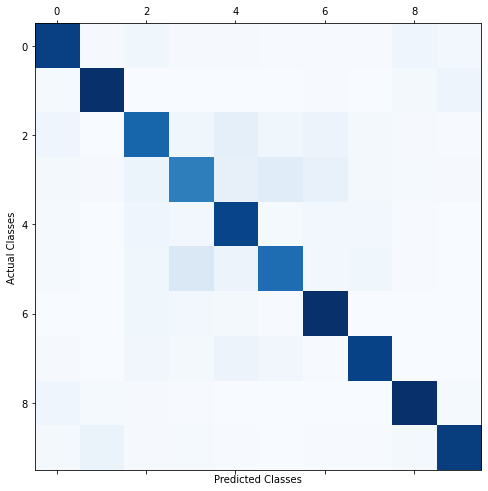

In [191]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

<div class="alert alert-block alert-info">
<b>tf.keras.models.load_model</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model</div>

In [192]:
model = tf.keras.models.load_model('./models/exp16_0.8327.h5')

In [193]:
preds = model.predict(test_images_norm)

In [194]:
preds.shape

(10000, 10)

### Predictions

In [195]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [196]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

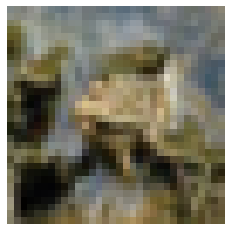

In [197]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2013]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [198]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [199]:
activations = activation_model.predict(img_tensor)
len(activations)

8

In [200]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d_118',
 'max_pooling2d_113',
 'dropout_54',
 'conv2d_119',
 'max_pooling2d_114',
 'dropout_55',
 'conv2d_120',
 'max_pooling2d_115',
 'dropout_56',
 'flatten_46',
 'dense_60']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


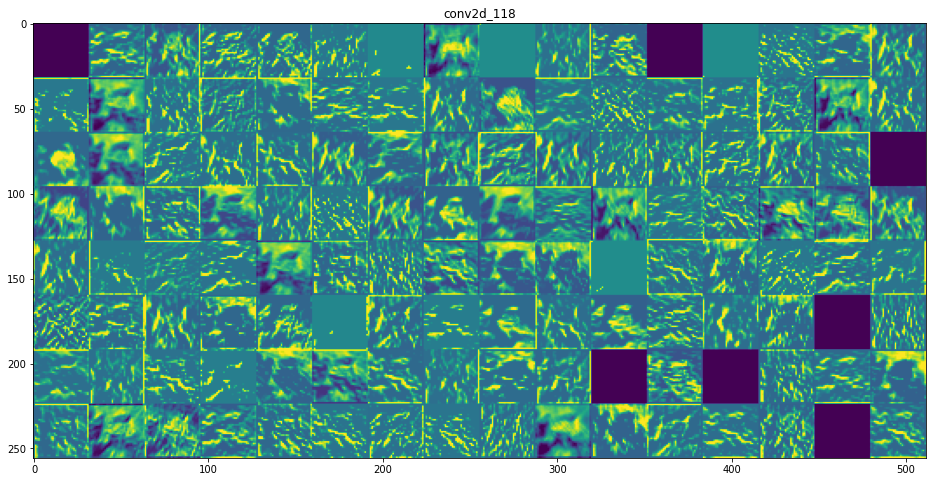

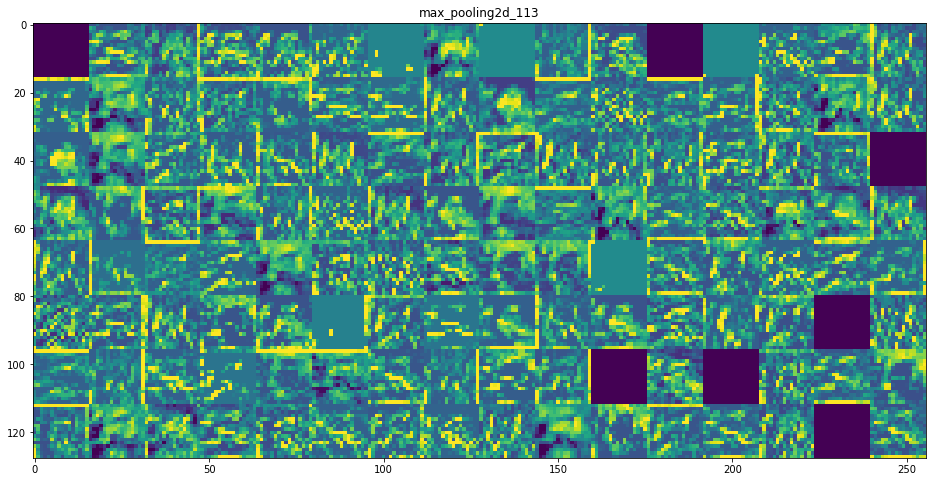

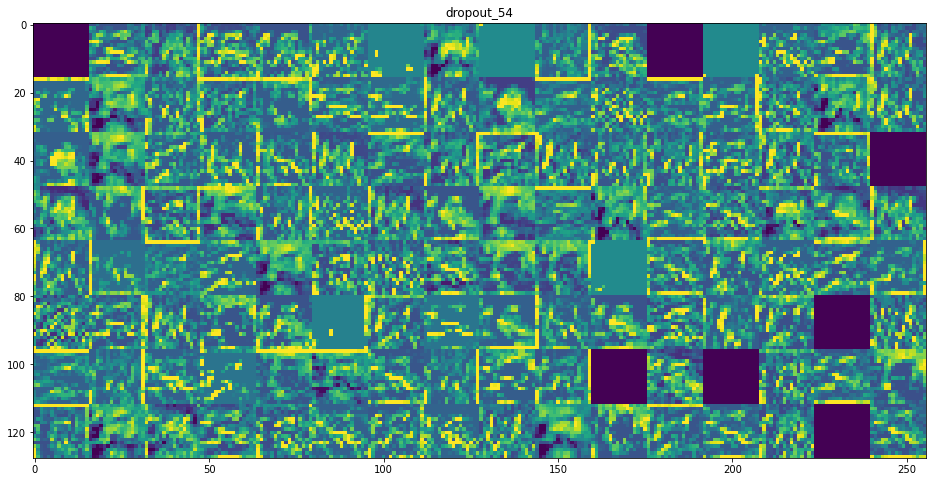

In [201]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();